In [ ]:
!pip install image==1.5.20
!pip install numpy==1.114.3
!pip install tensorflow


ERROR: Could not find a version that satisfies the requirement numpy==1.114.3 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.21.2, 1.21.3, 1.21.4, 1.21.5, 1.21.6, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0rc1, 1.23.0rc2, 1.23.0rc3, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23.4, 1.23.5, 1.24.0rc1, 1.24.0rc2, 1.24.0, 1.24.1, 1.24.2, 1.24.3, 1.24.4, 1.25.0rc1, 1.25.0, 1.25.1, 1.25.2, 1.26.0b1, 1.26.0rc1, 1.26.0, 1.26.1, 1.26.2, 1.26.3, 1.26.4, 2.0.0b1, 2.0.0

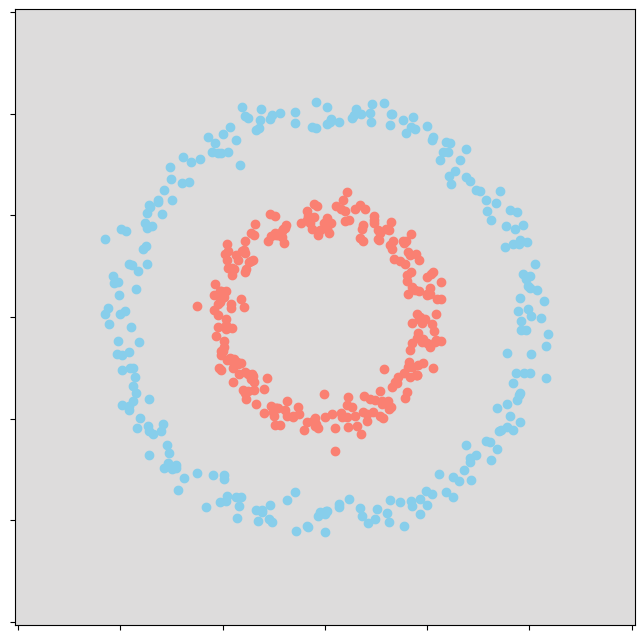

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

#resolucion del mapa de prediccion
res = 100

#coordenadas del mapa

_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1,2)

_pY = np.zeros((res, res))+0.5

plt.figure(figsize=(8,8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")
plt.tick_params(labelbottom = False, labelleft=False)



#Tensorflow

In [ ]:
timport tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

#Definition
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01 # learning rate
nn = [2, 16, 8, 1] # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
# W3 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

loss = tf.losses.mean_squared_error(pY, iY)

learning_rate = 0.05

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
n_steps = 10000
iPY = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  #iteramos n pases de entrenamiento.
  for step in range(n_steps):
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y})


    if step % 25 == 0:
      acc = np.mean(np.round(_pY) == Y)
      # Impresión de metricas
      print('Step', step, '/', n_steps, ' - Loss = ', _loss, ' - ACC =', acc)
      _pY = sess.run(pY, feed_dict={iX: _pX}).reshape(res, res)
      iPY.append(_pY)

ims = []
fig = plt.figure(figsize=(10,10))
print("---Generando animación ----")

for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  plt.tick_params(labelbottom = False, labelleft=False)
  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
plt.close()
''' HTML(ani.to_html_5_video()) '''

Step 0 / 10000  - Loss =  0.46771118  - ACC = 0.436
Step 25 / 10000  - Loss =  0.40563124  - ACC = 0.47
Step 50 / 10000  - Loss =  0.32551917  - ACC = 0.488
Step 75 / 10000  - Loss =  0.27534825  - ACC = 0.558
Step 100 / 10000  - Loss =  0.24617825  - ACC = 0.616
Step 125 / 10000  - Loss =  0.21902478  - ACC = 0.694
Step 150 / 10000  - Loss =  0.18908565  - ACC = 0.774
Step 175 / 10000  - Loss =  0.16221048  - ACC = 0.846
Step 200 / 10000  - Loss =  0.14262757  - ACC = 0.902
Step 225 / 10000  - Loss =  0.13113727  - ACC = 0.92
Step 250 / 10000  - Loss =  0.12268246  - ACC = 0.926
Step 275 / 10000  - Loss =  0.116162665  - ACC = 0.928
Step 300 / 10000  - Loss =  0.11088569  - ACC = 0.93
Step 325 / 10000  - Loss =  0.10624346  - ACC = 0.932
Step 350 / 10000  - Loss =  0.10204703  - ACC = 0.934
Step 375 / 10000  - Loss =  0.09819145  - ACC = 0.936
Step 400 / 10000  - Loss =  0.09458365  - ACC = 0.936
Step 425 / 10000  - Loss =  0.091162995  - ACC = 0.936
Step 450 / 10000  - Loss =  0.0877

' HTML(ani.to_html_5_video()) '

#keras

In [ ]:
import tensorflow as tf
import tensorflow.keras as kr


from IPython.core.display import display, HTML


lr = 0.01   # learning rate
nn = [2, 16, 8, 1] # número de neuronas por capa.

#creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

#añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

#añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

#añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

#compilamos el modelo, definiendo la función de coste y le optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])
# y se entrena el modelo. los callbacks
model.fit(X, Y, epochs=100)

ValueError: tf.enable_eager_execution must be called at program startup.

In [ ]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML

lr = 0.01   # learning rate
nn = [2, 16, 8, 1] # número de neuronas por capa.

#creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

#añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

#añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

#añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

#compilamos el modelo, definiendo la función de coste y le optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['acc'])
# y se entrena el modelo. los callbacks
# Suponiendo que X e Y son tus datos de entrada y salida
model.fit(X, Y, epochs=100)


NotImplementedError: numpy() is only available when eager execution is enabled.